In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import os 
import cv2
import numpy as np 
import pandas as pd
import csv
import datetime
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold,StratifiedKFold 
import pyprind
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = []
datetime_object = datetime.date.today() #I need it to save file bc I will train a lot 
print ('datetime_object',datetime_object)
data = pd.read_csv('./aug_word_data4.csv')
print ('data',data.head(4))

datetime_object 2023-03-17
data    label                                              image
0    Bản  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
1   chất  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
2    của  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
3  thành  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....


In [3]:
new_df = data.sample(1500)

In [4]:
new_df.reset_index()
new_df = new_df[['label','image']]

In [5]:
new_df

,label,image
83128,một,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
45057,xã,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
40233,dự,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
46845,nên,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
35569,để,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
...,...,...
105145,với,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
40484,tư,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
50622,xử,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....
34460,hà,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....


In [6]:
new_df.to_csv('./dataSamples.csv',index=False,encoding='utf-8')

In [39]:
def show_sample_image(new_df):
    labels = []
    images = []
    labels = new_df.iloc[: ,0].to_list() #If you want to take 100 image to test, use data.iloc[: 100 ,0].to_list()
    images = new_df.iloc[: ,1].to_list()
    t = []
    for i,image in enumerate(images):
        image = np.array(image.split(' '), dtype = float)
        t.append(image)
    images = t
    t = []
    images = np.array(images).reshape(-1, 128, 32, 1)
    plt.figure(num = 'char',figsize  = (12,7))
    for i in range(6):
        rand = random.randint(0,len(images))
        plt.subplot(3,2,i+1)
        plt.title(labels[rand])
        plt.imshow(np.rot90(np.fliplr(np.squeeze(images[rand,:,:,]))))
        plt.axis('off')
    plt.show()

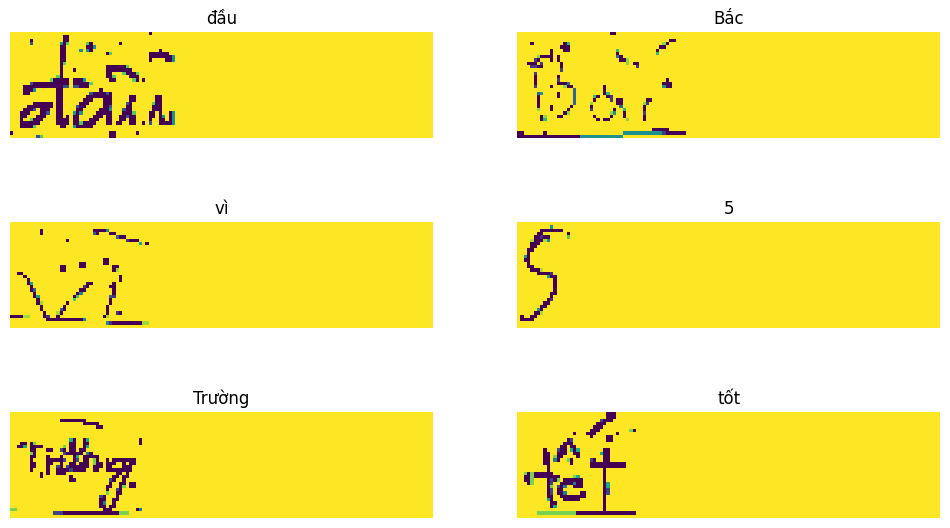

In [40]:
show_sample_image(new_df)

In [9]:
labels = []
images = []

labels = data.iloc[: ,0].to_list() #If you want to take 100 image to test, use data.iloc[: 100 ,0].to_list()
images = data.iloc[: ,1].to_list()
print ('\nThe number of data', len(labels))
max_str_len = max([len(str(label)) for i,label in enumerate(labels)])
print ('max_str_len',max_str_len)

data = [] #This code here for not exploding the RAM


The number of data 110746
max_str_len 11


In [10]:
count = 0
for i, label in enumerate(labels):
    if type(label) == float:
        del labels[i]
        del images[i]
        count +=1
print ('The number of invalid data:',count)
print ('The number of valid data left:',len(labels))

The number of invalid data: 12
The number of valid data left: 110734


In [11]:
t = []
for i,image in enumerate(images):
    image = np.array(image.split(' '), dtype = float)
    t.append(image)
images = []

In [12]:
images = t
t = []
print ('len images', len(images))

len images 110734


In [13]:
images = np.array(images).reshape(-1, 128, 32, 1)

# Split data to train_valid_test

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, train_size= 0.85, shuffle = True)

images = []
labels = [] #This code here for not exploding the RAM

print ('\nlen(X_train)',len(X_train))
print ('len(X_valid)',len(X_valid))
print ('\n X_train.shape',X_train.shape) #  X_train.shape (94123, 128, 32, 1)
print ('\n X_valid.shape',X_valid.shape) # X_valid.shape (16611, 128, 32, 1)


len(X_train) 94123
len(X_valid) 16611

 X_train.shape (94123, 128, 32, 1)

 X_valid.shape (16611, 128, 32, 1)


In [15]:
y_train[0] # 'đồng'

'có'

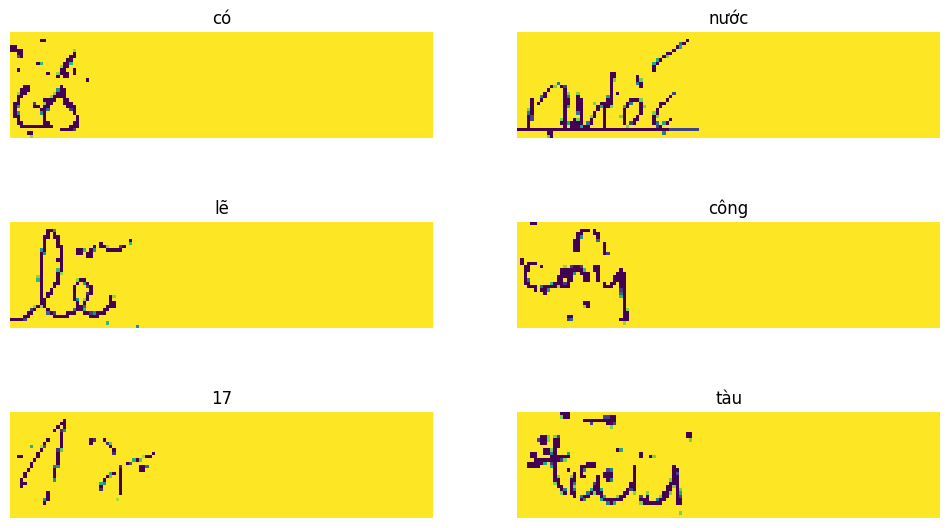

In [16]:
plt.figure(num = 'char',figsize  = (12,7))
for i in range(6):
    rand = random.randint(0,len(X_train))
    plt.subplot(3,2,i+1)
    plt.title(y_train[rand])
    plt.imshow(np.rot90(np.fliplr(np.squeeze(X_train[rand,:,:,]))))
    plt.axis('off')
plt.show()

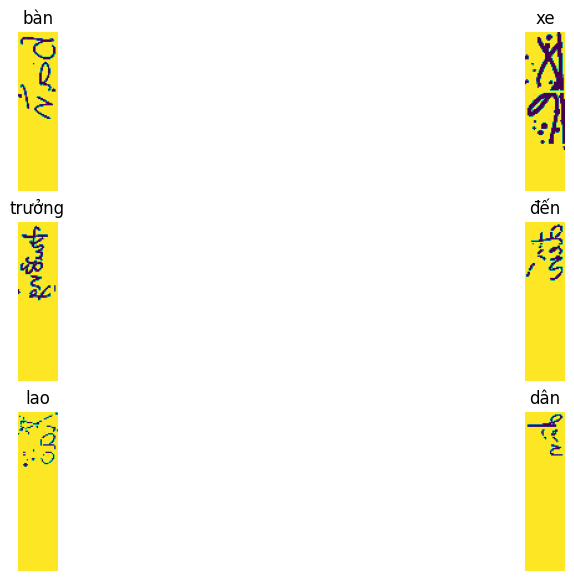

In [17]:
plt.figure(num = 'char',figsize  = (12,7))
for i in range(6):
    rand = random.randint(0,len(X_train))
    plt.subplot(3,2,i+1)
    plt.title(y_train[rand])
    plt.imshow((np.squeeze(X_train[rand,:,:,])))
    plt.axis('off')
plt.show()

# Prepare for CTC Loss

In [18]:
alphabets = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÀÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƒƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'
print ('the number of characters:', len(alphabets))
#max_str_len = 11 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 31  # max length of predicted labels # Đặt num_of_timestamps <= shape(last Dense model)


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

the number of characters: 147


In [19]:
train_y = np.ones([len(X_train), max_str_len]) * -1
train_label_len = np.zeros([len(X_train), 1])
train_input_len = np.ones([len(X_train), 1]) * (num_of_timestamps-2)
train_output = np.zeros([len(X_train)])

for i in range(len(X_train)):
    train_label_len[i] = len(y_train[i])
    train_y[i, 0:len(y_train[i])]= label_to_num(y_train[i])  

print ('len train_y',len(train_y))

len train_y 94123


In [20]:
train_y[0].shape #(11,)
train_label_len[0] # array([4.]) là nhãn của y_train[0] có 4 ký tự
train_input_len[0] # array([29.])
train_output.shape # (94123,) là array gồm 94123 ký tự 0
train_output #array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
# print(train_y[5])
# print(y_train[5])

In [22]:
valid_y = np.ones([len(X_valid), max_str_len]) * -1
valid_label_len = np.zeros([len(X_valid), 1])
valid_input_len = np.ones([len(X_valid), 1]) * (num_of_timestamps-2)
valid_output = np.zeros([len(X_valid)])

for i in range(len(X_valid)):
    valid_label_len[i] = len(y_valid[i])
    valid_y[i, 0:len(y_valid[i])]= label_to_num(y_valid[i])  
    
print ('len valid_y', len(valid_y))
#print('\n True label_train  : ',y_train[10] , '\ntrain_y : ',train_y[10],'\ntrain_label_len : ',train_label_len[10], '\ntrain_input_len : ', train_input_len[10])

len valid_y 16611


In [21]:
print('\n True label_train  : ',y_train[10] , '\ntrain_y : ',train_y[10],'\ntrain_label_len : ',train_label_len[10], '\ntrain_input_len : ', train_input_len[10])


 True label_train  :  tỉnh 
train_y :  [ 54. 119.  48.  42.  -1.  -1.  -1.  -1.  -1.  -1.  -1.] 
train_label_len :  [4.] 
train_input_len :  [29.]


# Build CRNN + CTC Loss

In [31]:
def build_word_model(alphabets, max_str_len, img_width = 128,img_height = 32):
    # Inputs to the model

    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    
    # First conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2),strides = 2, name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        128,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), strides = 2, name="pool2")(x)

    # Third conv block
    x = layers.Conv2D(
        256,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv3",
    )(x)
  

    # Fourth conv block
    x = layers.Conv2D(
        256,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv4",
    )(x)

    x = layers.MaxPooling2D((1, 2), name="pool4")(x)

    # Fifth conv block
    x = layers.Conv2D(
        512,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv5",
    )(x)

    x = layers.BatchNormalization(momentum = 0.8, name="BatchNormalization_1")(x)
    

    # Sixth conv block
    x = layers.Conv2D(
        512,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv6",
    )(x)

    x = layers.BatchNormalization(momentum = 0.8, name="BatchNormalization_2")(x)

    x = layers.MaxPooling2D((1, 2), name="pool6")(x)

    # Seventh conv block
    x = layers.Conv2D(
        512,
        (2, 2),
        activation="relu",
        kernel_initializer="he_normal",
        padding="valid",
        name="Conv7",
    )(x)


    # The number of filters in the last layer is 512. Reshape accordingly before
    # passing the output to the RNN part of the model

    new_shape = (31,512) #Không cần downsampling #Nên coi shape lớp trước

    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)

    #x = layers.Dense(512, activation="relu", name="dense1")(x)
    #x = layers.Dense(256, activation="relu", name="dense2")(x)
  
    #x = layers.Dropout(0.2)(x)
    
    def attention_rnn(inputs):
        # inputs.shape = (batch_size, time_steps, input_dim)
        input_dim = int(inputs.shape[2])
        timestep = int(inputs.shape[1])
        a = layers.Permute((2, 1))(inputs) #Permutes the dimensions of the input according to a given pattern.
        a = layers.Dense(timestep, activation='softmax')(a) #// Alignment Model + Softmax
        a = layers.Lambda(lambda x: keras.backend.mean(x, axis=1), name='dim_reduction')(a)
        a = layers.RepeatVector(input_dim)(a)
        a_probs = layers.Permute((2, 1), name='attention_vec')(a)
        output_attention_mul = layers.multiply([inputs, a_probs], name='attention_mul') #// Weighted Average 
        return output_attention_mul

    x = attention_rnn(x)
    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)

    # Output layer
    y_pred = layers.Dense(len(alphabets) + 1 , activation="softmax", name="last_dense")(x) # y pred
    word_model = keras.models.Model(inputs=input_img, outputs=y_pred, name="functional_1")

    def ctc_lambda_func(args):
        y_pred, labels, input_length, label_length = args
        # the 2 is critical here since the first couple outputs of the RNN
        # tend to be garbage
        y_pred = y_pred[:, 2:, :]
        return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

    labels = layers.Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

    ctc_loss = keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
    word_model_CTC = keras.models.Model(inputs=[input_img, labels, input_length, label_length], outputs=ctc_loss, name = "ocr_model_v1")
    
    return word_model, word_model_CTC

word_model, word_model_CTC = build_word_model(alphabets = alphabets, max_str_len = max_str_len)
word_model_CTC.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 32, 64)  640         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 16, 64)   0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 64, 16, 128)  73856       ['pool1[0][0]']       

# Training


In [35]:
epochs = 100
batch_size = 128
early_stopping_patience = 30

def scheduler(epoch):
    if epoch <= 25:
        return 1e-3  
    elif 25 < epoch <= 30:
        return 1e-4
    else:
        return 1e-5

# Add early stopping
my_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(scheduler),
    tf.keras.callbacks.ModelCheckpoint(filepath='./model_word/word_model_{epoch:02d}_'+str(datetime_object)+'.h5', 
                                    save_freq='epoch',
                                    monitor='val_loss',
                                    mode='auto',
                                    save_best_only=True,
                                    period = 5),
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
    )
]

word_model_CTC.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, 
                    optimizer=keras.optimizers.Adam(),                  
                    )



In [ ]:
history = word_model_CTC.fit(x=[X_train, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([X_valid, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs = epochs, 
                batch_size = batch_size,
                callbacks = my_callbacks,
                )


# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.savefig('./model_word/word_model_{}_loss.png'.format(datetime_object))
plt.show()


with open('./model_word/word_model_{}.txt'.format(datetime_object), 'w', encoding='utf-8') as f:
    f.write('len(X_train): {} \nlen (X_valid): {} \n'.format(len(X_train), len (X_valid)))
    f.write('max_str_len: {} \nnum_of_characters: {} \nnum_of_timestamps: {} \n'.format(max_str_len,num_of_characters,num_of_timestamps))
    f.write('batch_size: {} \nepochs: {} \n'.format(batch_size,epochs) )

In [36]:
train_y.shape

(94123, 11)

In [37]:
X_train.shape

(94123, 128, 32, 1)

In [30]:
train_input_len[3]

array([29.])

In [37]:
train_label_len[0]

array([2.])

In [43]:
train_output[]

0.0

word_model.save(r'E:\New folder/word_model_last.h5')

# Evaluation valid test

In [1]:
def avg_wer(wer_scores, combined_ref_len):
    return float(sum(wer_scores)) / float(combined_ref_len)


def _levenshtein_distance(ref, hyp):

    m = len(ref)
    n = len(hyp)

    # special case
    if ref == hyp:
        return 0
    if m == 0:
        return n
    if n == 0:
        return m

    if m < n:
        ref, hyp = hyp, ref
        m, n = n, m

    # use O(min(m, n)) space
    distance = np.zeros((2, n + 1), dtype=np.int32)

    # initialize distance matrix
    for j in range(0,n + 1):
        distance[0][j] = j

    # calculate levenshtein distance
    for i in range(1, m + 1):
        prev_row_idx = (i - 1) % 2
        cur_row_idx = i % 2
        distance[cur_row_idx][0] = i
        for j in range(1, n + 1):
            if ref[i - 1] == hyp[j - 1]:
                distance[cur_row_idx][j] = distance[prev_row_idx][j - 1]
            else:
                s_num = distance[prev_row_idx][j - 1] + 1
                i_num = distance[cur_row_idx][j - 1] + 1
                d_num = distance[prev_row_idx][j] + 1
                distance[cur_row_idx][j] = min(s_num, i_num, d_num)

    return distance[m % 2][n]


def word_errors(reference, hypothesis, ignore_case=False, delimiter=' '):
    if ignore_case == True:
        reference = reference.lower()
        hypothesis = hypothesis.lower()

    ref_words = reference.split(delimiter)
    hyp_words = hypothesis.split(delimiter)

    edit_distance = _levenshtein_distance(ref_words, hyp_words)
    return float(edit_distance), len(ref_words)


def char_errors(reference, hypothesis, ignore_case=False, remove_space=False):
    if ignore_case == True:
        reference = reference.lower()
        hypothesis = hypothesis.lower()

    join_char = ' '
    if remove_space == True:
        join_char = ''

    reference = join_char.join(filter(None, reference.split(' ')))
    hypothesis = join_char.join(filter(None, hypothesis.split(' ')))

    edit_distance = _levenshtein_distance(reference, hypothesis)
    return float(edit_distance), len(reference)


def wer(reference, hypothesis, ignore_case=False, delimiter=' '):
  
    edit_distance, ref_len = word_errors(reference, hypothesis, ignore_case,
                                         delimiter)

    if ref_len == 0:
        raise ValueError("Reference's word number should be greater than 0.")

    wer = float(edit_distance) / ref_len
    return wer


def cer(reference, hypothesis, ignore_case=False, remove_space=False):
 
    edit_distance, ref_len = char_errors(reference, hypothesis, ignore_case,
                                         remove_space)

    if ref_len == 0:
        raise ValueError("Length of reference should be greater than 0.")

    cer = float(edit_distance) / ref_len
    return cer

In [3]:
word_model = tf.keras.models.load_model(r'E:\AI\Handwriten\model_word\word_model_last.h5')
word_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 32, 64)  640         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 16, 64)   0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 64, 16, 128)  73856       ['pool1[0][0]']       

In [23]:
preds = word_model.predict(X_valid)
#print('\n preds',preds)
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])
#print ('\n decoded',decoded)
prediction = []
for i in range(len(X_valid)):
    prediction.append(num_to_label(decoded[i]))
    
#print ('\n predict',num_to_label(decoded[0]))

y_true = y_valid
correct_char = 0
total_char = 0
correct = 0
test_cer, test_wer = [], []

for i in range(len(X_valid)):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
    test_cer.append(cer(tr, pr))
    test_wer.append(wer(tr, pr))
                  
avg_cer = sum(test_cer)/len(test_cer)   
avg_wer = sum(test_wer)/len(test_wer)

print ('Average CER: %.2f%%' %(avg_cer*100))
print ('Average WER: %.2f%%' %(avg_wer*100))
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/len(X_valid)))

Average CER: 6.11%
Average WER: 14.76%
Correct characters predicted : 92.62%
Correct words predicted      : 85.24%


In [38]:
preds = word_model.predict(X_valid)
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds,input_length=np.ones(preds.shape[0])*preds.shape[1], greedy=True)[0][0])
prediction = []
for i in range(len(X_valid)):
    prediction.append(num_to_label(decoded[i]))

In [49]:
y_true = y_valid
correct_char = 0
total_char = 0
correct = 0
test_cer, test_wer = [],[]

In [42]:
for i in range(len(X_valid)):
    pr = prediction[i]
    tr = y_true[i]
    total_char +=len(tr)
    

In [52]:
min(len(tr),len(pr))

3

16611

In [25]:
for index in range (20):
    i = random.randint(0, len(X_valid))
    print ('True label: ',y_valid[i])
    print ('Predicted: ',prediction[i],'\n')

True label:  quốc
Predicted:  quốc 

True label:  nói
Predicted:  nói 

True label:  của
Predicted:  của 

True label:  nghĩ
Predicted:  nghĩ 

True label:  Sông
Predicted:  Sông 

True label:  mắt
Predicted:  mắt 

True label:  giờ
Predicted:  giờ 

True label:  ngân
Predicted:  ngân 

True label:  tham
Predicted:  tham 

True label:  này
Predicted:  này 

True label:  đang
Predicted:  đang 

True label:  mẹ
Predicted:  mẹ 

True label:  không
Predicted:  không 

True label:  tổ
Predicted:  tố 

True label:  Hà
Predicted:  Hồ 

True label:  khi
Predicted:  khi 

True label:  người
Predicted:  người 

True label:  an
Predicted:  an 

True label:  nuôi
Predicted:  nuôi 

True label:  lần
Predicted:  lần 



In [19]:
word_model = tf.keras.models.load_model(r'C:\Users\Administrator\PycharmProjects\pythonProject\word_model_last.h5')

In [41]:
preds = word_model.predict(X_valid)

In [42]:
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

In [45]:
decoded[0]

array([45, 42, 68, 55, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [46]:
prediction = []
for i in range(len(X_valid)):
    prediction.append(num_to_label(decoded[i]))

In [47]:
prediction[0]

'khâu'

In [54]:
decoded.shape #(16611, 31)
decoded[0].shape #(31,)
preds[0].shape #(31, 148)
preds.shape #(16611, 31, 148)
prediction[0]# 'nhiên'

'nhiên'

In [32]:
preds[0].shape #(31, 148)
preds.shape #(16611, 31, 148)

(16611, 31, 148)

In [29]:
(np.ones(preds.shape[0])*preds.shape[1]).shape # (16611,)
np.ones(preds.shape[0])*preds.shape[1] # array([31., 31., 31., ..., 31., 31., 31.])

array([31., 31., 31., ..., 31., 31., 31.])

In [157]:
decode = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(gh, input_length=[31.], 
                                   greedy=True)[0][0])

In [86]:
(np.ones(preds.shape[0])*preds.shape[1])

array([31., 31., 31., ..., 31., 31., 31.])

In [106]:
decode = decode.reshape(31,)

In [107]:
num_to_label(decode)

'thể'

In [104]:
decoded[0].shape

(31,)

In [108]:
train_y[122]

array([42., 66., 48., 41., -1., -1., -1., -1., -1., -1., -1.])

In [160]:
a.shape

(1, 128, 32, 1)

In [163]:
pic.shape

(1, 128, 32, 1)

In [53]:
pic = transformed_image
pic= pic.reshape(1,128,32,1)
gh=word_model.predict(pic)
decode = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(gh, input_length=[31.], 
                                   greedy=True)[0][0])
decode = decode.reshape(31,)
num_to_label(decode)

'rô'

'Nước'

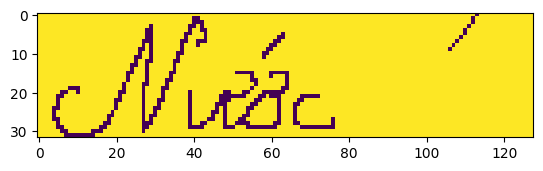

In [60]:
import cv2
import numpy as np

img_org = cv2.imread(r'C:/Users/Administrator/Downloads/test.png',0)
img = cv2.resize(img_org, (128, 32), cv2.INTER_CUBIC)
img = cv2.transpose(img)

# Transform image
transformed_image = transform_image(img)
plt.imshow(img_org)

pic = transformed_image
pic= pic.reshape(1,128,32,1)
gh=word_model.predict(pic)
decode = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(gh, input_length=[31.], 
                                   greedy=True)[0][0])
decode = decode.reshape(31,)
num_to_label(decode)

Nước


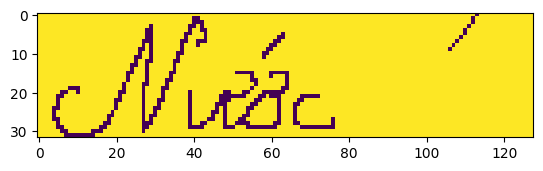

In [18]:
from flask import Flask, request
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
app = Flask(__name__)

# Load the saved .h5 model
model = tf.keras.models.load_model(r"./model_word/word_model_last.h5")

alphabets = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÀÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƒƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))

    return np.array(label_num)


def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret += alphabets[ch]
    return ret
# Preprocessing function
def preprocess_image(img):
    img = cv2.resize(img, (128, 32), cv2.INTER_CUBIC)
    img = cv2.transpose(img)

    # Transform image
    transformed_image = transform_image(img)
    return transformed_image


# Decoding function
def decode_result(encoded_result):
    decode = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(model, input_length=[31.],greedy=True)[0][0])
    decode = decode.reshape(31, )
    return decode

def transform_image(image):
    image = (255 - image) * (-10/255)
    return np.around(image)



image = cv2.imread(r'C:/Users/Administrator/Downloads/test.png',0)   
plt.imshow(image)
# Preprocess the input image
processed_image = preprocess_image(image)
processed_image = processed_image.reshape(1,128,32,1)
# Use the model to make a prediction
# prediction = model.predict(processed_image)
gh = model.predict(processed_image)
decode = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(gh, input_length=[31.],
                                                                greedy=True)[0][0])
decode = decode.reshape(31, )
# Decode the result
result = num_to_label(decode)

print(result)



In [3]:
model = tf.keras.models.load_model(r"./model_word/word_model_last.h5")

In [5]:
alphabets = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÀÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƒƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'
print ('the number of characters:', len(alphabets))
#max_str_len = 15 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 31  # max length of predicted labels # Đặt num_of_timestamps <= shape(last Dense model)


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

the number of characters: 147


In [19]:
preds = word_model.predict(X_valid)
#print('\n preds',preds)
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1],greedy=True)[0][0])

In [25]:
preds[0].shape

(31, 148)

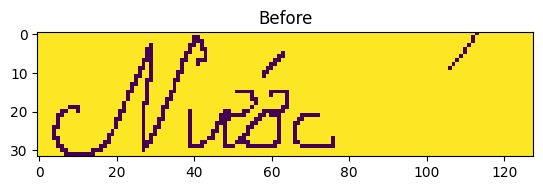

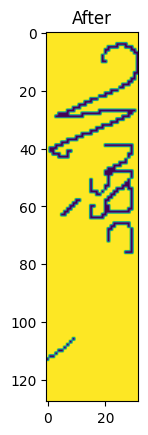

(128, 32)


(1, 128, 32, 1)

In [89]:
def pltshow(img,caption):
    plt.imshow(img)
    plt.title(caption)
    plt.show()
import cv2

img = cv2.imread(r'C:\Users\Administrator\PycharmProjects\pythonProject\picture\test.png',0)
pltshow(img,'Before')

def transform_image(image):
    image = (255 - image) * (-10/255)
    return np.around(image)
def preprocess_image(img):
    img = cv2.resize(img, (128, 32), cv2.INTER_CUBIC)
    img = cv2.transpose(img)

    # Transform image
    transformed_image = transform_image(img)
    return transformed_image
img = preprocess_image(img)
pltshow(img,'After')
print(img.shape)
img = np.array(img).reshape(-1, 128, 32, 1)
img.shape

In [90]:
model = tf.keras.models.load_model(r'C:\Users\Administrator\PycharmProjects\pythonProject\word_model_last.h5')

In [102]:
preds = model.predict(img)
decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])
num_to_label(decoded[0])
decoded.shape[0]

1

In [93]:
np.ones(preds.shape[0])*preds.shape[1]

array([31.])

In [17]:
cer('Nam','Ngạm')

0.6666666666666666

In [12]:
cer('kKhoa','Khoa')

0.2